# Import the Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


## Read CSV File

In [5]:
data=pd.read_csv(r"C:\Users\asus\Documents\Custom Office Templates\OneDrive\Pictures\airlines.csv")
data.head(2)

,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,NaN,Solo Leisure,Economy Class,Moroni to Moheli,Nov-19,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,E120,Solo Leisure,Economy Class,Moroni to Anjouan,Jun-19,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no


## Data Preprocessing

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airline Name            23171 non-null  object 
 1   Overall_Rating          23171 non-null  object 
 2   Review_Title            23171 non-null  object 
 3   Review Date             23171 non-null  object 
 4   Verified                23171 non-null  bool   
 5   Aircraft                7129 non-null   object 
 6   Type Of Traveller       19433 non-null  object 
 7   Seat Type               22075 non-null  object 
 8   Route                   19343 non-null  object 
 9   Date Flown              19417 non-null  object 
 10  Seat Comfort            19016 non-null  float64
 11  Cabin Staff Service     18911 non-null  float64
 12  Food & Beverages        14500 non-null  float64
 13  Ground Service          18378 non-null  float64
 14  Inflight Entertainment  10829 non-null

In [9]:
data = data.drop_duplicates()  # Remove duplicate rows

Airline Name                  0
Overall_Rating                0
Review_Title                  0
Review Date                   0
Verified                      0
Aircraft                  15906
Type Of Traveller          3609
Seat Type                   975
Route                      3698
Date Flown                 3624
Seat Comfort               4029
Cabin Staff Service        4134
Food & Beverages           8540
Ground Service             4664
Inflight Entertainment    12209
Wifi & Connectivity       17114
Value For Money             945
Recommended                   0
dtype: int64


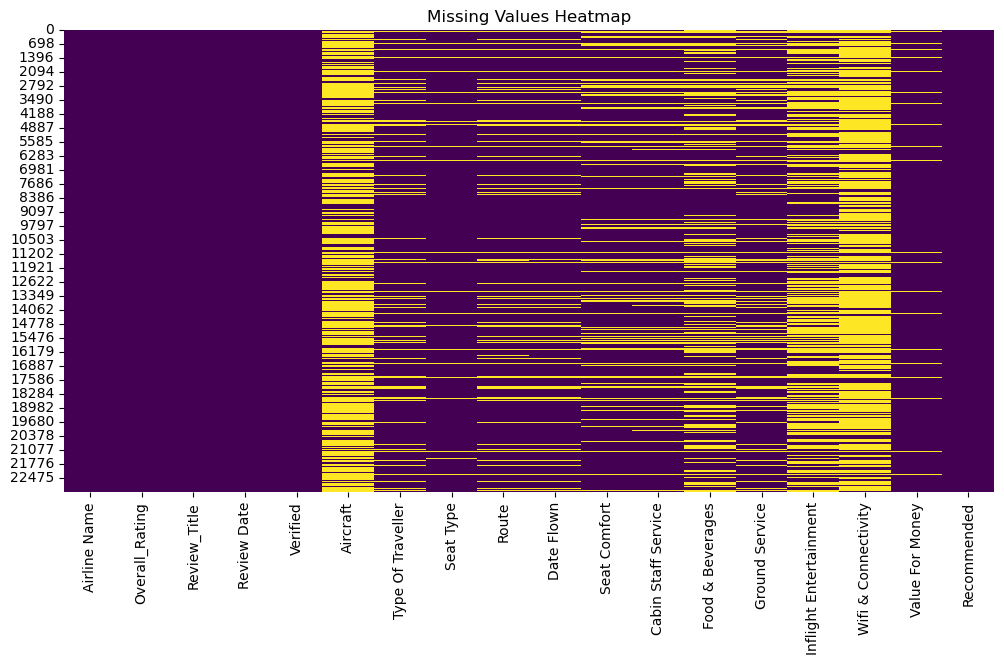

In [11]:
print(data.isnull().sum())

# Visualize missing values with a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [13]:
data['Seat Comfort'] = data['Seat Comfort'].fillna(data['Seat Comfort'].mean())
data['Cabin Staff Service'] = data['Cabin Staff Service'].fillna(data['Cabin Staff Service'].median())
data['Food & Beverages'] = data['Food & Beverages'].fillna(data['Food & Beverages'].median())
data['Ground Service'] = data['Ground Service'].fillna(data['Ground Service'].mean())
data['Inflight Entertainment'] = data['Inflight Entertainment'].fillna(data['Inflight Entertainment'].median())
data['Wifi & Connectivity'] = data['Wifi & Connectivity'].fillna(data['Wifi & Connectivity'].median())
data['Value For Money'] = data['Value For Money'].fillna(data['Value For Money'].mean())

In [15]:
data['Type Of Traveller'] = data['Type Of Traveller'].fillna(data['Type Of Traveller'].mode()[0])
data['Seat Type'] = data['Seat Type'].fillna(data['Seat Type'].mode()[0])
data['Route'] = data['Route'].fillna(data['Route'].mode()[0])
data['Date Flown'] = data['Date Flown'].fillna(data['Date Flown'].mode()[0])

In [17]:
# Create mapping of most common Aircraft per Airline
aircraft_mapping = data.groupby('Airline Name')['Aircraft'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Fill missing Aircraft values based on Airline Name using map()
data['Aircraft'] = data['Aircraft'].fillna(data['Airline Name'].map(aircraft_mapping))

In [19]:
print(data.isnull().sum())  # Ensure missing values are handled

Airline Name                0
Overall_Rating              0
Review_Title                0
Review Date                 0
Verified                    0
Aircraft                  460
Type Of Traveller           0
Seat Type                   0
Route                       0
Date Flown                  0
Seat Comfort                0
Cabin Staff Service         0
Food & Beverages            0
Ground Service              0
Inflight Entertainment      0
Wifi & Connectivity         0
Value For Money             0
Recommended                 0
dtype: int64


In [21]:
data['Aircraft'] = data['Aircraft'].fillna(data['Aircraft'].mode()[0])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23032 entries, 0 to 23170
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airline Name            23032 non-null  object 
 1   Overall_Rating          23032 non-null  object 
 2   Review_Title            23032 non-null  object 
 3   Review Date             23032 non-null  object 
 4   Verified                23032 non-null  bool   
 5   Aircraft                23032 non-null  object 
 6   Type Of Traveller       23032 non-null  object 
 7   Seat Type               23032 non-null  object 
 8   Route                   23032 non-null  object 
 9   Date Flown              23032 non-null  object 
 10  Seat Comfort            23032 non-null  float64
 11  Cabin Staff Service     23032 non-null  float64
 12  Food & Beverages        23032 non-null  float64
 13  Ground Service          23032 non-null  float64
 14  Inflight Entertainment  23032 non-null  flo

In [24]:
# Remove suffixes from the date string
data['Review Date'] = data['Review Date'].str.replace(r'(\d+)(st|nd|rd|th)', r'\1', regex=True)

# Convert to datetime format
data['Review Date'] = pd.to_datetime(data['Review Date'], errors='coerce', dayfirst=True)

In [27]:
data['Verified'] = data['Verified'].astype(int)

In [29]:
categorical_columns = ['Airline Name', 'Type Of Traveller', 'Seat Type', 'Route', 'Aircraft', 'Recommended']
data[categorical_columns] = data[categorical_columns].astype('category')

In [31]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 23032 entries, 0 to 23170
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Airline Name            23032 non-null  category      
 1   Overall_Rating          23032 non-null  object        
 2   Review_Title            23032 non-null  object        
 3   Review Date             23032 non-null  datetime64[ns]
 4   Verified                23032 non-null  int32         
 5   Aircraft                23032 non-null  category      
 6   Type Of Traveller       23032 non-null  category      
 7   Seat Type               23032 non-null  category      
 8   Route                   23032 non-null  category      
 9   Date Flown              23032 non-null  object        
 10  Seat Comfort            23032 non-null  float64       
 11  Cabin Staff Service     23032 non-null  float64       
 12  Food & Beverages        23032 non-null  float64    

## EDA

Recommended
no     66.155783
yes    33.844217
Name: proportion, dtype: float64


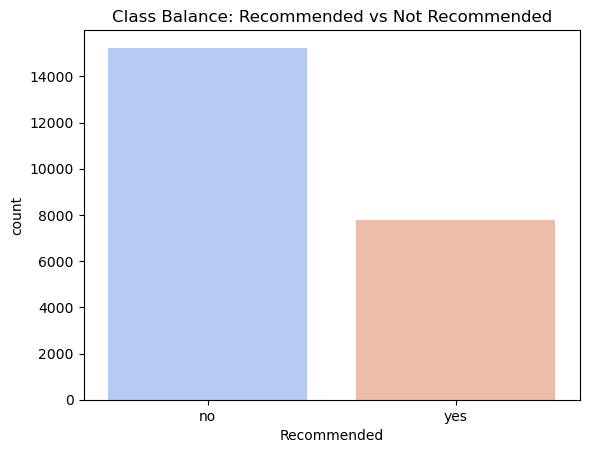

In [33]:
# Check class balance
print(data['Recommended'].value_counts(normalize=True) * 100)

# Visualize it
sns.countplot(data=data, x='Recommended', palette='coolwarm')
plt.title("Class Balance: Recommended vs Not Recommended")
plt.show()

In [35]:
print(data.info())      # Data types & missing values
print(data.describe())  # Summary stats for numerical features

<class 'pandas.core.frame.DataFrame'>
Index: 23032 entries, 0 to 23170
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Airline Name            23032 non-null  category      
 1   Overall_Rating          23032 non-null  object        
 2   Review_Title            23032 non-null  object        
 3   Review Date             23032 non-null  datetime64[ns]
 4   Verified                23032 non-null  int32         
 5   Aircraft                23032 non-null  category      
 6   Type Of Traveller       23032 non-null  category      
 7   Seat Type               23032 non-null  category      
 8   Route                   23032 non-null  category      
 9   Date Flown              23032 non-null  object        
 10  Seat Comfort            23032 non-null  float64       
 11  Cabin Staff Service     23032 non-null  float64       
 12  Food & Beverages        23032 non-null  float64    

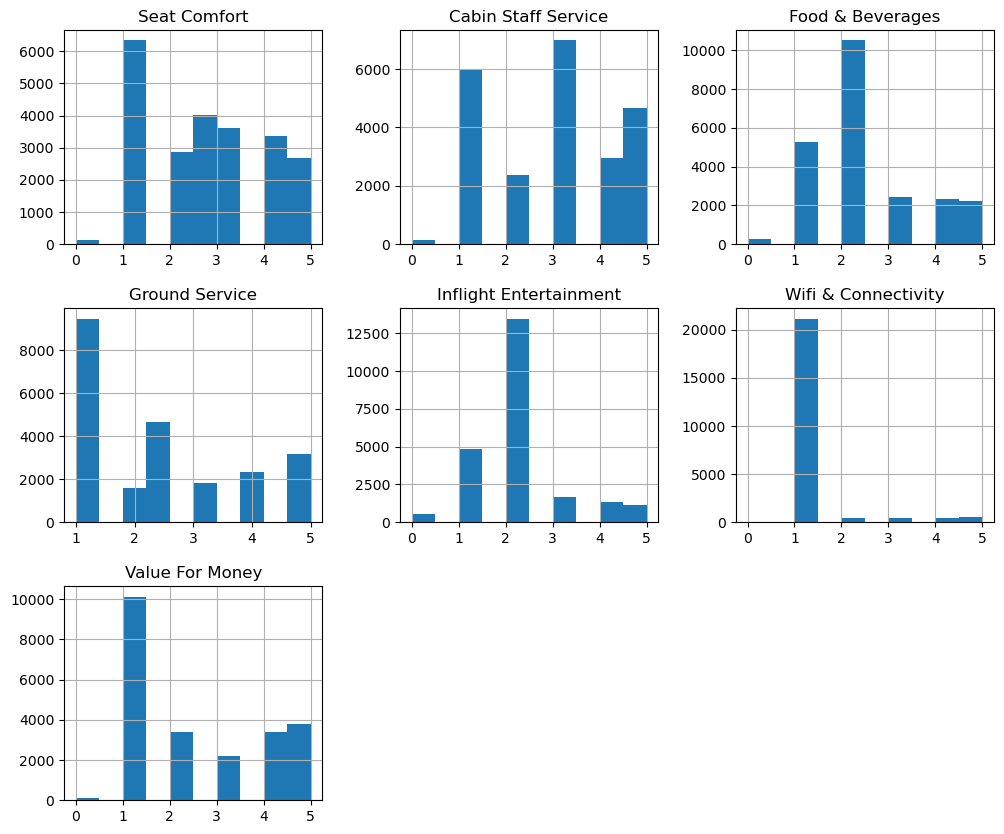

In [37]:
# Histograms for better visualization
data[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 
      'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity', 
      'Value For Money']].hist(figsize=(12, 10))
plt.show()

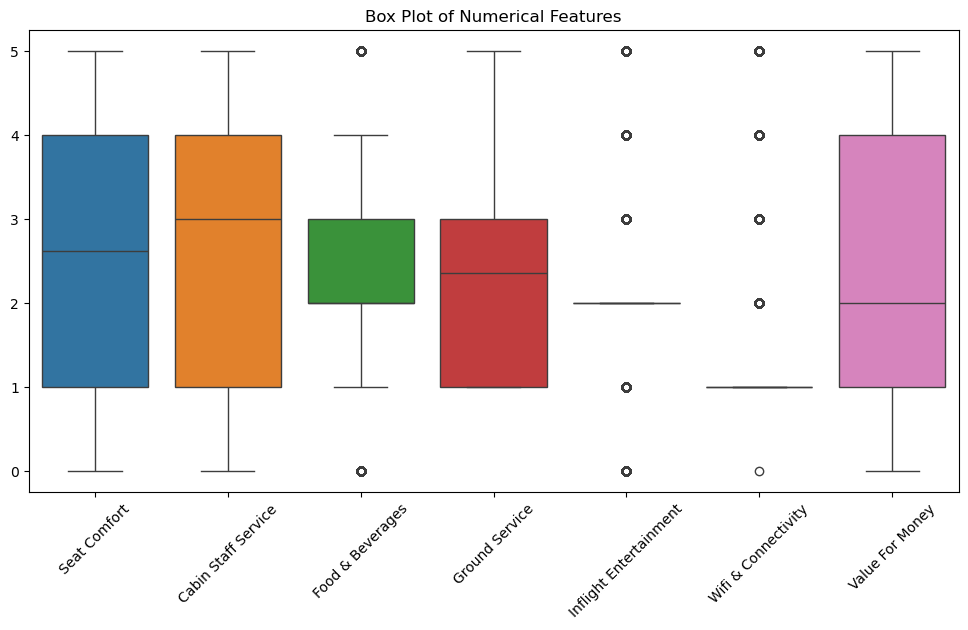

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 
                       'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity', 
                       'Value For Money']])
plt.xticks(rotation=45)
plt.title("Box Plot of Numerical Features")
plt.show()


In [41]:
print(data['Airline Name'].value_counts().head(10))  # Top 10 airlines

Airline Name
flydubai                 100
SpiceJet                 100
Dragonair                100
TAP Portugal             100
EVA Air                  100
TAM Airlines             100
Egyptair                 100
El Al Israel Airlines    100
Emirates                 100
Ethiopian Airlines       100
Name: count, dtype: int64


In [43]:
# Detect non-numeric entries in numerical columns
print(data.select_dtypes(include=['float', 'int64', 'int32']).head())
for column in ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money']:
    print(column, data[data[column].apply(lambda x: not isinstance(x, (int, float)))])

   Verified  Seat Comfort  Cabin Staff Service  Food & Beverages  \
0         1           4.0                  5.0               4.0   
1         1           2.0                  2.0               1.0   
2         1           2.0                  1.0               1.0   
3         0           1.0                  1.0               2.0   
4         1           1.0                  1.0               1.0   

   Ground Service  Inflight Entertainment  Wifi & Connectivity  \
0             4.0                     2.0                  1.0   
1             1.0                     2.0                  1.0   
2             1.0                     2.0                  1.0   
3             1.0                     2.0                  1.0   
4             1.0                     1.0                  1.0   

   Value For Money  
0              3.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0  
Seat Comfort Empty DataFrame
Columns: [Airline Name, Overall_Rating,

In [45]:
columns_to_clean = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 
                    'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity', 
                    'Value For Money']
for column in columns_to_clean:
    data[column] = pd.to_numeric(data[column], errors='coerce')  # Convert invalid entries to NaN

In [47]:
# Fill NaN with mean or drop rows with missing numerical values
data[columns_to_clean] = data[columns_to_clean].fillna(data[columns_to_clean].mean())

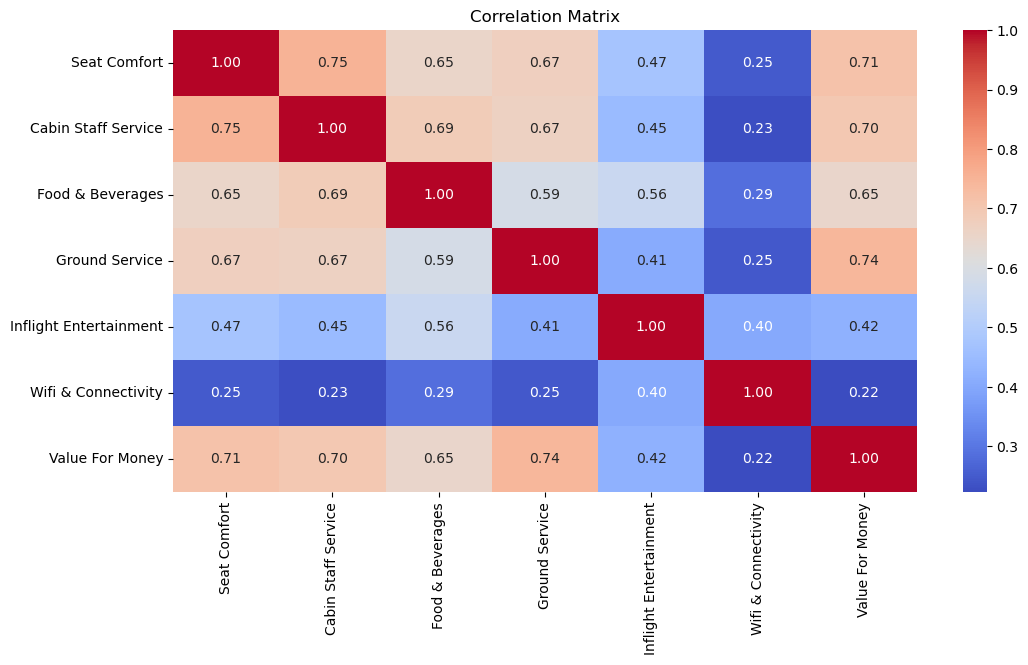

In [49]:
# Compute and plot correlation matrix
corr_matrix = data[columns_to_clean].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [51]:
# Use the IQR method to detect outliers
Q1 = data[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
           'Ground Service', 'Inflight Entertainment', 
           'Wifi & Connectivity', 'Value For Money']].quantile(0.25)
Q3 = data[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
           'Ground Service', 'Inflight Entertainment', 
           'Wifi & Connectivity', 'Value For Money']].quantile(0.75)
IQR = Q3 - Q1

# Define thresholds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (data[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
                  'Ground Service', 'Inflight Entertainment', 
                  'Wifi & Connectivity', 'Value For Money']] < lower_bound) | \
           (data[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
                  'Ground Service', 'Inflight Entertainment', 
                  'Wifi & Connectivity', 'Value For Money']] > upper_bound)

# Sum up the number of outliers per column
print(outliers.sum())

Seat Comfort                 0
Cabin Staff Service          0
Food & Beverages          2492
Ground Service               0
Inflight Entertainment    9545
Wifi & Connectivity       1859
Value For Money              0
dtype: int64


In [53]:
data['Food & Beverages'] = data['Food & Beverages'].clip(lower=lower_bound['Food & Beverages'], upper=upper_bound['Food & Beverages'])

In [55]:
data = data[(data['Inflight Entertainment'] >= lower_bound['Inflight Entertainment']) & 
            (data['Inflight Entertainment'] <= upper_bound['Inflight Entertainment'])]

In [57]:
data['Wifi & Connectivity'] = np.log1p(data['Wifi & Connectivity'])

## Label Encoding

In [59]:
# Apply Label Encoding to binary categorical features
encoder = LabelEncoder()
data['Recommended'] = encoder.fit_transform(data['Recommended'])  # Convert "yes/no" into 0/1
data['Verified'] = encoder.fit_transform(data['Verified'])  # Convert boolean to 0/1

# One-Hot Encoding for categorical features
categorical_columns = ['Airline Name', 'Type Of Traveller', 'Seat Type', 'Route', 'Aircraft']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)  # Prevent multicollinearity

print("Categorical encoding complete!")

Categorical encoding complete!


In [61]:
print("Missing values per column:\n", data.isnull().sum())
print(data.info())  # Confirm datatypes after encoding

Missing values per column:
 Overall_Rating         0
Review_Title           0
Review Date            0
Verified               0
Date Flown             0
                      ..
Aircraft_twin otter    0
Aircraft_twin prop     0
Aircraft_unknown       0
Aircraft_unkonwn       0
Aircraft_various       0
Length: 15168, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 13487 entries, 0 to 23170
Columns: 15168 entries, Overall_Rating to Aircraft_various
dtypes: bool(15155), datetime64[ns](1), float64(7), int32(1), int64(1), object(3)
memory usage: 196.3+ MB
None


## Train-Test Split 

In [63]:
# Define X (features) and y (target)
X = data.drop('Recommended', axis=1)  
y = data['Recommended']  

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train-Test Split Done!")

Train-Test Split Done!


In [65]:
# Find non-numeric columns in X_train
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# Check if specific columns contain invalid values like 'n'
for col in X_train.columns:
    if X_train[col].dtype == 'object':  # Only check object-type columns
        print(f"{col}: ", X_train[col].unique())  # Show unique values

Non-numeric columns: Index(['Overall_Rating', 'Review_Title', 'Date Flown'], dtype='object')
Overall_Rating:  ['n' '1' '3' '7' '2' '8' '5' '6' '9' '4']
Review_Title:  ['Regional Express customer review' '"Great customer service"'
 '"no intention of providing refunds"' ... '"such exemplary client care"'
 '"isn\'t going to help you"' '"Would gladly fly again"']
Date Flown:  ['Jun-23' 'Oct-22' 'Apr-20' 'Nov-19' 'Sep-22' 'Jan-20' 'Dec-18' 'Sep-20'
 'Aug-21' 'Aug-20' 'Jul-19' 'Mar-23' 'Jul-15' 'Mar-16' 'Jul-23' 'May-23'
 'Oct-19' 'Apr-22' 'Jul-17' 'Aug-18' 'Jun-22' 'Dec-22' 'Feb-23' 'Apr-16'
 'Oct-17' 'Apr-23' 'Aug-16' 'Oct-18' 'Sep-17' 'Sep-18' 'Jan-16' 'Mar-20'
 'Nov-17' 'Mar-17' 'Sep-16' 'Jun-21' 'Jul-21' 'Sep-21' 'Jan-23' 'Nov-22'
 'Feb-20' 'Aug-22' 'Oct-16' 'Jan-17' 'Jun-19' 'Jul-22' 'Apr-19' 'Feb-19'
 'Mar-22' 'Sep-19' 'Nov-18' 'Jan-19' 'Aug-19' 'Nov-15' 'Oct-21' 'Jun-16'
 'Dec-17' 'Feb-18' 'Dec-19' 'Jun-17' 'Mar-19' 'Jun-18' 'Apr-21' 'Apr-18'
 'Mar-21' 'Jan-22' 'May-18' 'Nov-21' 'Jan

In [67]:
X_train.drop(columns=['Review_Title'], inplace=True)  # Remove text column
print("Dropped Review_Title to fix SMOTE issues.")

Dropped Review_Title to fix SMOTE issues.


In [69]:
# Convert Date Flown to datetime format
X_train['Date Flown'] = pd.to_datetime(X_train['Date Flown'], format='%b-%y')

# Extract year as a numerical feature
X_train['Flight_Year'] = X_train['Date Flown'].dt.year

# Drop original column
X_train.drop(columns=['Date Flown'], inplace=True)

print("Converted Date Flown to numeric Flight_Year.")

Converted Date Flown to numeric Flight_Year.


In [71]:
# Replace 'n' with NaN and convert the column to numeric
X_train['Overall_Rating'].replace("n", pd.NA, inplace=True)
X_train['Overall_Rating'] = pd.to_numeric(X_train['Overall_Rating'], errors='coerce')  # Convert to float
X_train.fillna(X_train.median(), inplace=True)  # Fill NaNs with median values

print("Fixed Overall_Rating column.")

Fixed Overall_Rating column.


In [73]:
# Convert Flight_Year from datetime to integer
X_train['Flight_Year'] = X_train['Flight_Year'].astype(int)

print("Flight_Year converted to integer successfully!")

Flight_Year converted to integer successfully!


In [75]:
print(X_train.info())  # Ensure all columns are numeric

<class 'pandas.core.frame.DataFrame'>
Index: 10789 entries, 16750 to 12651
Columns: 15166 entries, Overall_Rating to Flight_Year
dtypes: bool(15155), datetime64[ns](1), float64(8), int32(1), int64(1)
memory usage: 156.9 MB
None


In [77]:
# Check for non-numeric columns
non_numeric_cols = X_train.select_dtypes(exclude=['int64', 'float64']).columns
print("Non-numeric columns:", non_numeric_cols)

# Drop or transform non-numeric columns
for col in non_numeric_cols:
    print(f"{col}: {X_train[col].unique()}")  # Print unique values to identify issues

Non-numeric columns: Index(['Review Date', 'Airline Name_ANA All Nippon Airways',
       'Airline Name_ASKY Airlines', 'Airline Name_ATA Airlines',
       'Airline Name_Adria Airways', 'Airline Name_Aegean Airlines',
       'Airline Name_Aer Lingus', 'Airline Name_Aero VIP',
       'Airline Name_AeroItalia', 'Airline Name_Aerocaribbean',
       ...
       'Aircraft_caravan', 'Aircraft_cessna', 'Aircraft_dreamliner',
       'Aircraft_embraer', 'Aircraft_twin otter', 'Aircraft_twin prop',
       'Aircraft_unknown', 'Aircraft_unkonwn', 'Aircraft_various',
       'Flight_Year'],
      dtype='object', length=15157)
Review Date: <DatetimeArray>
['2005-01-17 00:00:00', '2022-10-30 00:00:00', '2021-02-19 00:00:00',
 '2023-06-27 00:00:00', '2008-10-27 00:00:00', '2020-10-08 00:00:00',
 '2023-06-02 00:00:00', '2023-05-15 00:00:00', '2020-01-03 00:00:00',
 '2018-12-15 00:00:00',
 ...
 '2021-07-09 00:00:00', '2009-08-29 00:00:00', '2009-07-13 00:00:00',
 '2005-02-27 00:00:00', '2007-02-01 00:00:00

In [78]:
X_train.drop(columns=['Review Date'], inplace=True)
print("Dropped Review Date column.")

Dropped Review Date column.


In [81]:
# Ensure one-hot encoded columns are cast as float
one_hot_cols = X_train.select_dtypes(include=['bool']).columns
X_train[one_hot_cols] = X_train[one_hot_cols].astype(float)

print("Converted one-hot encoded columns to float.")

Converted one-hot encoded columns to float.


In [83]:
print(X_train.info())  # Confirm all columns are numeric

<class 'pandas.core.frame.DataFrame'>
Index: 10789 entries, 16750 to 12651
Columns: 15165 entries, Overall_Rating to Flight_Year
dtypes: float64(15163), int32(1), int64(1)
memory usage: 1.2 GB
None


## BALANCING THE DATASET

In [85]:
# Balancing the classes in the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("SMOTE applied successfully!")
print(f"Balanced class distribution:\n{pd.Series(y_train_balanced).value_counts(normalize=True) * 100}")


SMOTE applied successfully!
Balanced class distribution:
Recommended
0    50.0
1    50.0
Name: proportion, dtype: float64


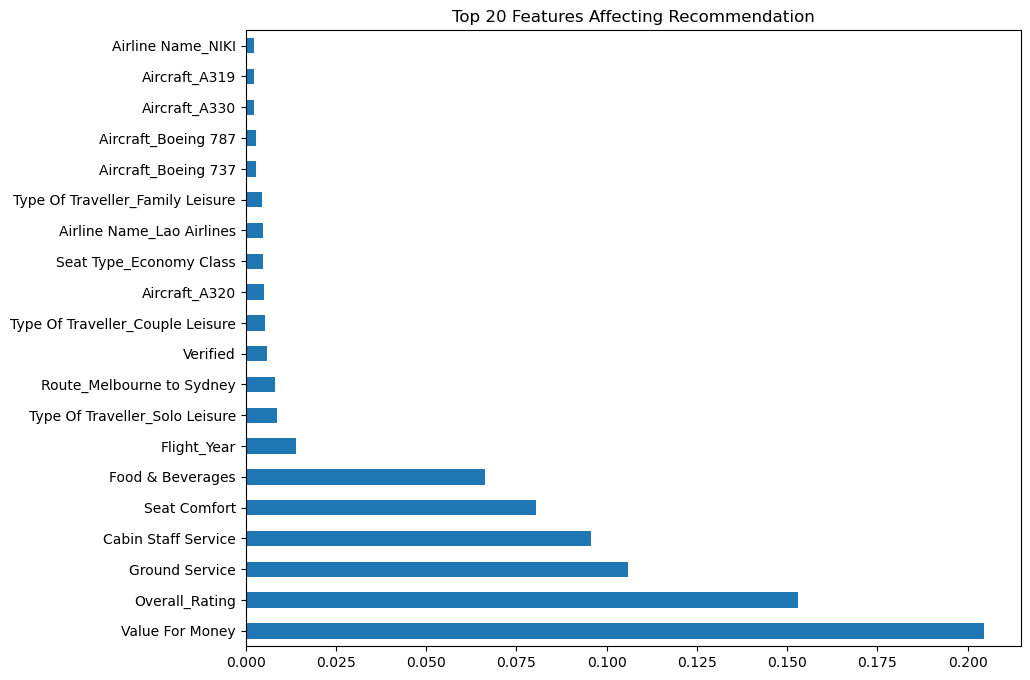

In [87]:
# Feature importance using Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# Get top 20 features by importance
importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances.nlargest(20).plot(kind='barh', figsize=(10, 8))
plt.title("Top 20 Features Affecting Recommendation")
plt.show()

In [89]:
print("Training Features:", X_train_balanced.columns)
print("Test Features:", X_test.columns)

Training Features: Index(['Overall_Rating', 'Verified', 'Seat Comfort', 'Cabin Staff Service',
       'Food & Beverages', 'Ground Service', 'Inflight Entertainment',
       'Wifi & Connectivity', 'Value For Money',
       'Airline Name_ANA All Nippon Airways',
       ...
       'Aircraft_caravan', 'Aircraft_cessna', 'Aircraft_dreamliner',
       'Aircraft_embraer', 'Aircraft_twin otter', 'Aircraft_twin prop',
       'Aircraft_unknown', 'Aircraft_unkonwn', 'Aircraft_various',
       'Flight_Year'],
      dtype='object', length=15165)
Test Features: Index(['Overall_Rating', 'Review_Title', 'Review Date', 'Verified',
       'Date Flown', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
       'Ground Service', 'Inflight Entertainment',
       ...
       'Aircraft_bombardier', 'Aircraft_caravan', 'Aircraft_cessna',
       'Aircraft_dreamliner', 'Aircraft_embraer', 'Aircraft_twin otter',
       'Aircraft_twin prop', 'Aircraft_unknown', 'Aircraft_unkonwn',
       'Aircraft_various'

In [91]:
drop_columns = ['Review_Title', 'Review Date', 'Date Flown']
X_test.drop(columns=[col for col in drop_columns if col in X_test.columns], inplace=True)

print("Dropped extra columns from X_test.")

Dropped extra columns from X_test.


In [93]:
if 'Flight_Year' not in X_test.columns:
    X_test['Flight_Year'] = X_train_balanced['Flight_Year'].median()  # Fill with median
    print("Added Flight_Year column to X_test.")

Added Flight_Year column to X_test.


In [95]:
print("Matching Features:", set(X_train_balanced.columns) == set(X_test.columns))

Matching Features: True


In [97]:
for col in X_test.columns:
    if X_test[col].dtype == 'object':  # Check only object-type columns
        print(f"{col}: ", X_test[col].unique())  # Display unique values

Overall_Rating:  ['8' '9' '1' 'n' '7' '4' '6' '2' '3' '5']


In [99]:
# Replace 'n' with NaN
X_test['Overall_Rating'].replace("n", pd.NA, inplace=True)

# Convert column to numeric format
X_test['Overall_Rating'] = pd.to_numeric(X_test['Overall_Rating'], errors='coerce')

# Fill missing values with the median rating
X_test['Overall_Rating'].fillna(X_test['Overall_Rating'].median(), inplace=True)

print("Fixed Overall_Rating column!")

Fixed Overall_Rating column!


In [101]:
print(X_test.info())  # Confirm all columns are numeric
print(X_test.isnull().sum())  # Verify NaNs were handled

<class 'pandas.core.frame.DataFrame'>
Index: 2698 entries, 18530 to 18355
Columns: 15165 entries, Overall_Rating to Flight_Year
dtypes: bool(15155), float64(9), int64(1)
memory usage: 39.2 MB
None
Overall_Rating         0
Verified               0
Seat Comfort           0
Cabin Staff Service    0
Food & Beverages       0
                      ..
Aircraft_twin prop     0
Aircraft_unknown       0
Aircraft_unkonwn       0
Aircraft_various       0
Flight_Year            0
Length: 15165, dtype: int64


In [103]:
y_pred = model.predict(X_test)
print("Prediction successful!")

Prediction successful!


In [105]:
# Make Predictions with Logistic Regression
y_pred = model.predict(X_test)

# Evaluate Performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1833   43]
 [  68  754]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1876
           1       0.95      0.92      0.93       822

    accuracy                           0.96      2698
   macro avg       0.96      0.95      0.95      2698
weighted avg       0.96      0.96      0.96      2698



## GRID SEARCH CV

In [ ]:
# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],  
    'solver': ['liblinear', 'lbfgs'],  
    'max_iter': [500, 1000]  
}

# Perform Grid Search
grid = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=5)
grid.fit(X_train_balanced, y_train_balanced)

# Print best parameters
print("Best Logistic Regression Parameters:", grid.best_params_)

## LOGISTIC REGRESSION

In [107]:
# Train optimized Logistic Regression model
optimized_model = LogisticRegression(C=0.1, max_iter=500, solver='liblinear', class_weight='balanced', random_state=42)
optimized_model.fit(X_train_balanced, y_train_balanced)

# Predict on test data
y_pred_optimized = optimized_model.predict(X_test)

# Evaluate performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_optimized))
print("\nClassification Report:\n", classification_report(y_test, y_pred_optimized))

Confusion Matrix:
 [[1788   88]
 [  44  778]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96      1876
           1       0.90      0.95      0.92       822

    accuracy                           0.95      2698
   macro avg       0.94      0.95      0.94      2698
weighted avg       0.95      0.95      0.95      2698



## RANDOM FOREST

In [109]:
# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Confusion Matrix:
 [[1833   43]
 [  68  754]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1876
           1       0.95      0.92      0.93       822

    accuracy                           0.96      2698
   macro avg       0.96      0.95      0.95      2698
weighted avg       0.96      0.96      0.96      2698



In [111]:
data.replace('n', np.nan, inplace=True)

In [113]:
non_numeric_cols = data.select_dtypes(include=['object']).columns
print(non_numeric_cols)

Index(['Overall_Rating', 'Review_Title', 'Date Flown'], dtype='object')


In [115]:
# Example: Encode Review_Title
data['Review_Title'] = LabelEncoder().fit_transform(data['Review_Title'])

In [117]:
print(data['Date Flown'].head())

0    Nov-19
1    Jun-19
2    Jun-19
3    Sep-19
6    Sep-19
Name: Date Flown, dtype: object


In [119]:
data['Date Flown'] = pd.to_datetime(data['Date Flown'], format='%b-%y', errors='coerce')


In [121]:
# Fill missing dates with a placeholder (e.g., earliest date or median date)
data['Date Flown'].fillna(pd.Timestamp('2000-01-01'), inplace=True)

# OR drop rows with invalid dates
data.dropna(subset=['Date Flown'], inplace=True)

In [123]:
data['Flight_Year'] = data['Date Flown'].dt.year
data['Flight_Month'] = data['Date Flown'].dt.month

# Drop the original date column if no longer needed
data.drop(['Date Flown'], axis=1, inplace=True)

In [125]:
print(data[['Flight_Year', 'Flight_Month']].head())

   Flight_Year  Flight_Month
0         2019            11
1         2019             6
2         2019             6
3         2019             9
6         2019             9


## STANDARD SCALER

In [127]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['Overall_Rating', 'Seat Comfort', 'Cabin Staff Service']])

In [129]:
# Fill missing values with median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_scaled)  # Replace X_scaled with your feature matrix

In [131]:
# Drop rows with NaN values
X_cleaned = X_scaled[~np.isnan(X_scaled).any(axis=1)]

In [133]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

X_preprocessed = pipeline.fit_transform(data[['Overall_Rating', 'Seat Comfort', 'Cabin Staff Service']])

In [135]:
print(np.isnan(X_preprocessed).sum())  # Should return 0 if no NaN values remain

0


In [137]:
# Apply K-Means on the preprocessed data
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_preprocessed)  # Use your cleaned and scaled dataset
data['Cluster'] = clusters  # Add cluster labels to the dataframe

In [139]:
print(data.dtypes)

Overall_Rating              object
Review_Title                 int32
Review Date         datetime64[ns]
Verified                     int64
Seat Comfort               float64
                         ...      
Aircraft_unkonwn              bool
Aircraft_various              bool
Flight_Year                  int32
Flight_Month                 int32
Cluster                      int32
Length: 15170, dtype: object


In [141]:
data['Overall_Rating'] = pd.to_numeric(data['Overall_Rating'], errors='coerce')

In [143]:
data['Overall_Rating'].fillna(data['Overall_Rating'].median(), inplace=True)

## K MEANS CLUSTERING

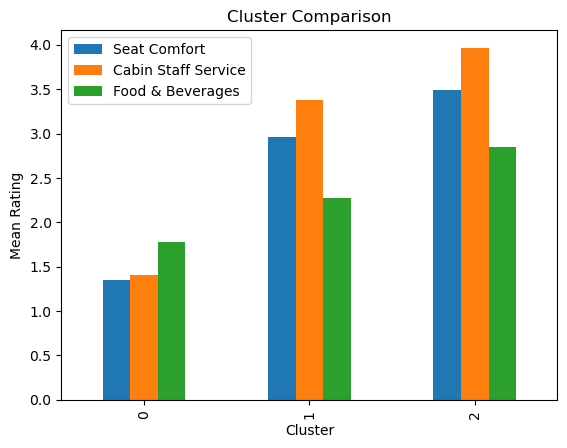

In [145]:
cluster_summary = data.groupby('Cluster').mean()
cluster_summary[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages']].plot(kind='bar')
plt.title('Cluster Comparison')
plt.ylabel('Mean Rating')
plt.show()

In [147]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['Overall_Rating', 'Seat Comfort', 'Cabin Staff Service']])  # Use relevant features

In [149]:
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
clusters = kmeans.fit_predict(X_scaled)
data['Cluster'] = clusters  # Add cluster labels to your dataframe

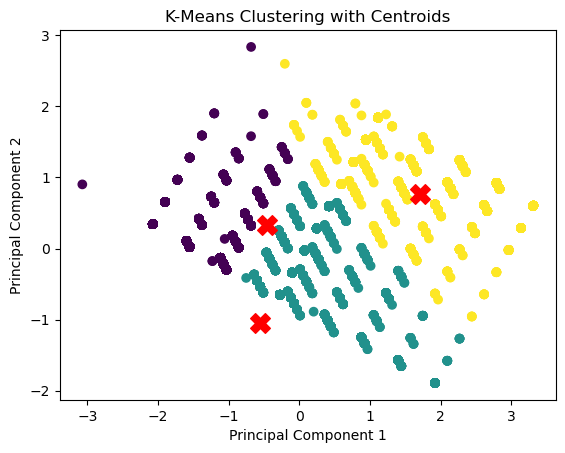

In [151]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)  # Add centroids
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with Centroids')
plt.show()

Observations:
- Cluster 0 (Purple):- Appears tightly packed, suggesting a group with less variability among members.
- Likely passengers with more consistent characteristics.

- Cluster 1 (Teal):- Slightly more spread out compared to others, indicating some variability.
- Could be passengers with mixed characteristics or preferences.

- Cluster 2 (Yellow):- Similar spread to Cluster 1, suggesting some diversity in this group.






In [153]:
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)

         Overall_Rating  Review_Title                   Review Date  Verified  \
Cluster                                                                         
0              1.426520   5085.214696 2020-11-08 04:28:08.846338048  0.633557   
1              1.682849   6290.485947 2018-01-05 14:03:01.667198720  0.486266   
2              7.740729   6439.835904 2017-07-26 04:50:10.436494848  0.424680   

         Seat Comfort  Cabin Staff Service  Food & Beverages  Ground Service  \
Cluster                                                                        
0            1.346303             1.405457          1.778243        1.288000   
1            2.964824             3.374800          2.269642        2.368094   
2            3.486337             3.966853          2.851329        3.518756   

         Inflight Entertainment  Wifi & Connectivity  ...  Aircraft_cessna  \
Cluster                                               ...                    
0                           2.0      

In [156]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_preprocessed, clusters)  # X_preprocessed: your scaled data
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4721036317412852


In [158]:
for k in range(2, 10):  # Test clusters from 2 to 9
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_preprocessed)
    score = silhouette_score(X_preprocessed, clusters)
    print(f"Clusters: {k}, Silhouette Score: {score}")

Clusters: 2, Silhouette Score: 0.4682279745669829
Clusters: 3, Silhouette Score: 0.4721036317412852
Clusters: 4, Silhouette Score: 0.5146686413012688
Clusters: 5, Silhouette Score: 0.5234063639900415
Clusters: 6, Silhouette Score: 0.5190596905489104
Clusters: 7, Silhouette Score: 0.5344360485061586
Clusters: 8, Silhouette Score: 0.5442598328348198
Clusters: 9, Silhouette Score: 0.5470996838145517


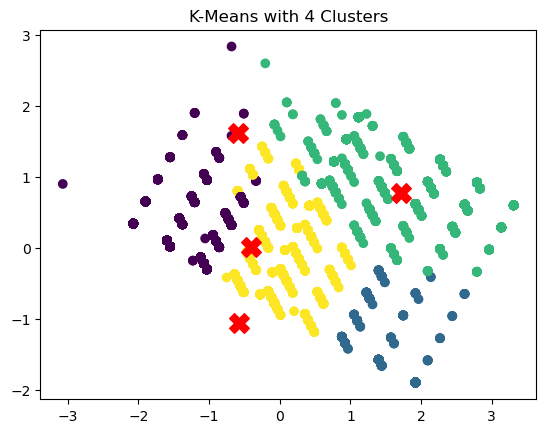

In [160]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_preprocessed)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.title('K-Means with 4 Clusters')
plt.show()

In [162]:
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)

         Overall_Rating  Review_Title                   Review Date  Verified  \
Cluster                                                                         
0              1.426520   5085.214696 2020-11-08 04:28:08.846338048  0.633557   
1              1.682849   6290.485947 2018-01-05 14:03:01.667198720  0.486266   
2              7.740729   6439.835904 2017-07-26 04:50:10.436494848  0.424680   

         Seat Comfort  Cabin Staff Service  Food & Beverages  Ground Service  \
Cluster                                                                        
0            1.346303             1.405457          1.778243        1.288000   
1            2.964824             3.374800          2.269642        2.368094   
2            3.486337             3.966853          2.851329        3.518756   

         Inflight Entertainment  Wifi & Connectivity  ...  Aircraft_cessna  \
Cluster                                               ...                    
0                           2.0      